In [1]:
from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen
from fake_useragent import UserAgent
from selenium import webdriver
import requests
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from random import randint
import numpy
import random
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
%matplotlib inline

In [2]:
def recommendation_system(title,plot):
    
    movies=pd.read_csv("movies_metadata.csv")
    movies=movies.loc[:,['id','title','overview']]
    movies.loc[len(movies)]=[randint(0,10)+1000,title,plot]
    tfidf = TfidfVectorizer(stop_words='english')
    movies['overview'] = movies['overview'].fillna('')
    tfidf_matrix = tfidf.fit_transform(movies['overview'])
    similarity_distance = cosine_similarity(tfidf_matrix,tfidf_matrix)
    
    def get_recommendations(title, cosine_sim=similarity_distance):
        # Get the index of the movie that matches the title
        idx  = movies['id'][movies['title']==title].index[0]

        # Get all movies with same similarity score
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        return movies.iloc[movie_indices][:10]

    data=get_recommendations(title)
    
    return data

In [3]:
def episode_guide(link):
    ua = UserAgent()
    response=requests.get(link, {"User-Agent": ua.random})
    soup=BeautifulSoup(response.text,'lxml')
    seasons=0

    for i in soup.select('#title-episode-widget > div > div:nth-child(4)'):
        k=i.find_all('a')
        if(k):
            for j in k[:1]:
                seasons=int(j.text.strip())
        else:
            seasons=0

    if(seasons):
        for i in range(seasons):
            #link='https://www.imdb.com/title/tt0903747/'
            link_=link+'episodes?season={}'.format(i)
            response=requests.get(link_, {"User-Agent": ua.random})
            soup=BeautifulSoup(response.text,'lxml')

            content=soup.find('div',class_='clear')
            season_no=content.find('h3',id='episode_top')
            print(season_no.text.strip()+'\n')

            content2=content.find('div',class_='list detail eplist')

            for j in content2.find_all('div',class_='list_item odd'):
                    title=j.find('strong')
                    title_name=title.find('a')
                    print('Episode Name: '+title_name['title']+"\t")

                    rating=j.find('div',class_='ipl-rating-widget')
                    if(rating):
                        rating_=rating.find('div',class_='ipl-rating-star small')
                        if(rating_):
                            rating_1=rating_.find('span',class_='ipl-rating-star__rating')
                            if(rating_1):
                                print('Rating: '+rating_1.text.strip()+'\t')

                    date=j.find('div',class_='airdate')
                    if(date):
                        print("Date Aired: "+date.text.strip()+'\t')

                    summary=j.find('div',class_='item_description')
                    if(summary):
                        print('Summary: '+summary.text.strip()+"\n")


            for j in content2.find_all('div',class_='list_item even'):
                    title=j.find('strong')
                    if(title):
                        title_name=title.find('a')
                        print('Episode Name: '+title_name['title']+"\t")

                    rating=j.find('div',class_='ipl-rating-widget')
                    if(rating):
                        rating_=rating.find('div',class_='ipl-rating-star small')
                        if(rating_):
                            rating_1=rating_.find('span',class_='ipl-rating-star__rating')
                            if(rating_1):
                                print('Rating: '+rating_1.text.strip()+'\t')

                    date=j.find('div',class_='airdate')
                    if(date):
                        print("Date Aired: "+date.text.strip()+'\t')

                    summary=j.find('div',class_='item_description')
                    if(summary):
                        print('Summary: '+summary.text.strip()+"\n")

    else:
        print('No guide as it is a movie')


In [13]:
#Function to extract information 
def scrapper_media(imdb_link):
        
        ua = UserAgent()
        response=requests.get(imdb_link, {"User-Agent": ua.random})
        soup=BeautifulSoup(response.text,'lxml')
        
        if(re.search('https://www.imdb.com',imdb_link)):
            
            #Name
            for j in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper')[:1]:
                if(j):
                    print('Name:'+j.text.strip()[:20]+"\n\n")
                    title=j.text.strip()[:20]
                    
                    
            #Storyline
            for j in soup.select('#titleStoryLine div:nth-child(3) p span'):
                if(j):
                    print('Storyline:\n'+j.text.strip()+"\n\n")
                    plot=j.text.strip()
                
            #Rating
            for k in soup.select('#title-overview-widget div.vital div.title_block div div.ratings_wrapper div.imdbRating div strong span'):
                if(k):
                    print("Rating:"+k.text+"\n\n")
                
            #Number of Seasons
            for i in soup.select('#title-episode-widget > div > div:nth-child(4)'):
                k=i.find_all('a')
                if(k):
                    for j in k[:1]:
                        print("Number of Seasons: "+j.text.strip()+'\n')
                        
                    
            #Number of Episodes    
            for k in soup.select('#title-overview-widget > div.vital > div.button_panel.navigation_panel > a > div > div > span'):
                if(k):
                    print("Number of episodes:"+k.text.strip()[:3]+"\n")
                    
                    
            #Episode Length
            for i in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper > div > time'):
                if(i):
                    print("Episode Length:"+i.text.strip()+"\n\n")
                
            #Poster    
            content=soup.find('div',class_='poster')
            if(content):
                co=content.find('a')
                co2=co.find('img')
                response = requests.get(co2['src'])
                img = Image.open(BytesIO(response.content))
                plt.imshow(img)
                
            #Genres        
            for k in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper > div'):
                if(k):
                    q=k.find_all('a')
                    print("Genres:\n")
                    for i in q[:-1]:
                        print(i.text)
                    print('\n')
                
            #Creators and Star Cast    
            content=soup.find('div',class_='plot_summary')
            if(content):
                for i in content.find_all('div',class_='credit_summary_item'):
                    j=i.find('h4')
                    if(j):
                        if((j.text.strip()=='Creator:')|(j.text.strip()=='Creators:')):
                            w=i.find_all('a')
                            print('Creator:')
                            for s in w:
                                if(s.text.strip()=='See full cast & crew'):
                                    break
                                else:
                                    print(s.text.strip())
                            print('\n')
                        elif(j.text.strip()=='Stars:'):
                            w=i.find_all('a')
                            print('Stars:')
                            for s in w:
                                if(s.text.strip()=='See full cast & crew'):
                                    break
                                else:
                                    print(s.text.strip())
                            print('\n')
                    else:
                        print('Not Available')
                
            
            #Release Data
            for i in soup.select('#titleDetails'):
                k=i.find_all('div',class_='txt-block')
                if(k):
                    for j in k[3:4]:
                        print(j.text.strip()[:40])
                    print('\n')
                
            #Trivia And Goofs    
            content=soup.find('div',id='titleDidYouKnow')
            if(content):
                trivia=content.find('div',id='trivia')
                if(trivia):
                    print("Trivia: "+trivia.text[7:-24].strip()+"\n")
                    
                goof=content.find('div',id="goofs")
                if(goof):
                    print('Goofs: '+goof.text[6:-24].strip()+"\n")
            
    
            #People also like    
            content3=soup.find('div',class_='rec_slide')
            if(content3):
                print('People also like: \n')
                for i in content3.find_all('div',class_='rec_item'):
                    j=i.find('a')
                    k=j.find('img')
                    print(k['alt'])
                print('\n\n')
            
            
            #Reviews    
            reviews=[]
            link2=imdb_link+'reviews?ref_=tt_urv'
            response2=requests.get(link2, {"User-Agent": ua.random})
            soup2=BeautifulSoup(response2.text,'lxml')
            content2=soup2.find('div',class_='lister-list')
            
            ctr=0
            
            print('User Reviews: \n')
            if(content2):
                for i in content2.find_all('div',class_='review-container'):
                    j=i.find('div',class_='content')
                    print(j.text.strip())
                    print('-----------------------------------------------------------------------------------------------------------')
                    ctr=ctr+1
                    reviews.append(j.text.strip())
            
                    if(ctr==5):
                        break
            
            #Photos
            q=[]
            for i in soup.select('#titleImageStrip > div.mediastrip'):
                k=i.find_all('a')
                if(k):
                    for j in k:
                        a=j.find('img')
                        print(a['loadlate'])
                        q.append(a['loadlate'])

                else:
                    print('Not Available')
                    
            
            type_='show'
            
            for i in soup.select('#titleDetails > h3:nth-child(11)'):
                x=i.text
                
                if x:
                    if x=='Box Office':
                        
                        type_='movie'                        
                        c=input('Do you want to show recommended movies')
                        if(c=='y' or c=='yes'):
                            df=recommendation_system(title,plot)
                            print(df)
                        else:
                            print('Bye')
                    else:
                        c=input('Want the episode guide (y/n)')
        
                        if(c=='y'or c=='yes'):
                            episode_guide(imdb_link)
                        else:
                            print('Bye')
                else:
                    c=input('Want the episode guide (y/n)')
                    
                    if(c=='y'or c=='yes'):
                        episode_guide(imdb_link)
                    else:
                        print('Bye')
                        
            if(type_=='show'):
                c=input('Want the episode guide (y/n)')
                if(c=='y'or c=='yes'):
                    episode_guide(imdb_link)
                else:
                    print('Bye')               
            
        else:
            print('Not Available')
        

In [6]:
def scrapper_star(imdb_link):
    
    ua = UserAgent()
    imdb_links=imdb_link[:-1]
    imdb_links2=imdb_links+'bio?ref_=nm_ov_bio_sm'
    response=requests.get(imdb_links2, {"User-Agent": ua.random})
    soup=BeautifulSoup(response.text,'lxml')
    response2=requests.get(imdb_links, {"User-Agent": ua.random})
    soup2=BeautifulSoup(response2.text,'lxml')
    
    if(re.search('https://www.imdb.com',imdb_links)):

        #Name and picture
        content=soup.find('div',class_='subpage_title_block name-subpage-header-block')
        if(content):
            a=content.find('a')
            im=a.find('img')
            k=im['src']
            response = requests.get(k)
            img = Image.open(BytesIO(response.content))
            plt.imshow(img)
                    
        #Title   
        title=content.find('div',class_='parent')
        if(title):
            print("Name: "+title.text.strip()+'\n')
            name=title.text.strip()
          

        #Overview
        content2=soup.find('table',class_='dataTable labelValueTable')
        if(content2):
            for i in content2.find_all('tr'):
                #print(":")
                j=i.text.strip()
                j=j.replace('\n'," ").replace('    ',' ')
                print(j)
            print('\n\n')
            

        #Bio
        content3=soup.find('div',class_='soda odd')
        p=content3.find('p')
        if(p):
            print(p.text.strip())
            print('\n\n')
        
        #Spouse
        content4=soup.find('table',id='tableSpouses')
        if(content4):

            for i in content4.find_all('tr'):
                j=i.find('td')
                print("Spouse: "+j.text.strip()+"\n\n")

        #Known For
        content5=soup2.find('div',id='knownfor')
        if(content5):
            print('Known For: ')
            for i in content5.find_all('div',class_='knownfor-title'):
                j=i.find('div',class_='knownfor-title-role')
                k=j.find('a')
                print(k['title'])
            print('\n\n')


        #Awards Won
        link=imdb_links+'awards?ref_=nm_awd'
        response=requests.get(link, {"User-Agent": ua.random})
        soup4=BeautifulSoup(response.text,'lxml')
        content7=soup4.find('div',class_='article listo')
        if(content7):
            q=[]
            for i in content7.find_all('table',class_='awards'):
                a=i.find_all('tr')
                for j in a:
                    k=j.find_all('td')
                    row=[w.text for w in k]
                    q.append(row)
            df=pd.DataFrame(q)
            #print(q)
            df[0]=df[0].str.replace('\n','')
            df[1]=df[1].str.replace('\n',' ')
            df[2]=df[2].str.replace('\n',' ')
            df=df[df[1].str.contains('Winner',na=False)]
            df=df.reset_index()
            df.drop('index',axis=1,inplace=True)
            df.columns=['Year','Award',"Category"]
            df['Award']=df['Award'].apply(lambda x: x[7:])
            #print(df)
            with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
                print(df)
                
            
            return name

In [7]:
def link_extract(name):
    query = name
    
    query = urllib.parse.quote_plus(query) # Format into URL encoding
    number_result = 1
    ua = UserAgent()
    google_url = "https://www.google.com/search?q=" + query +"imdb"+"&num=" + str(number_result)
    response = requests.get(google_url, {"User-Agent": ua.random})
    soup = BeautifulSoup(response.text, "html.parser")
    result_div = soup.find_all('div', attrs = {'class': 'ZINbbc'})
    for r in result_div:
        # Checks if each element is present, else, raise exception
        try:
            link = r.find('a', href = True)
            title = r.find('div', attrs={'class':'vvjwJb'}).get_text()
            #description = r.find('div', attrs={'class':'s3v9rd'}).get_text()
            # Check to make sure everything is present before appending
            if link != '':
                imdb_links=link['href'][7:44]
                #print(imdb_links)
                #titles.append(title)
                #descriptions.append(description)
                # Next loop if one element is not present
                break
        except:
            continue
    return imdb_links


In [8]:
def movie():
    name=input('Please specify the name of movie/show:')
    imdb_link=link_extract(name)

    cat=scrapper_media(imdb_link)
    
    if(cat=='show'):
        c=input('Want the episode guide (y/n)')

        if(c=='y'):
            episode_guide(imdb_link)
        else:
            print('No Problem')
        
def star():
    name=input('Please specify the name of star:')
    imdb_link=link_extract(name)
    scrapper_star(imdb_link)

In [9]:
def ask_user():
    user_input=str(input('What are you looking for - Movie/Show/Star/Actor'))
    user_input=user_input.lower()
    user_input=re.sub(" ",'',user_input)
    print(user_input)
    star_=re.compile(r"star|actor|actress")
    movie_ = re.compile(r'movie|film|show|tv|cinema')
    
    is_movie=movie_.match(user_input)
    is_star=star_.match(user_input)

    if is_movie:
        movie()
        
    if is_star:
        star()
    

What are you looking for - Movie/Show/Star/Actormovie
movie
Please specify the name of movie/show:interstellar
Name:Interstellar (2014) 


Storyline:
Earth's future has been riddled by disasters, famines, and droughts. There is only one way to ensure mankind's survival: Interstellar travel. A newly discovered wormhole in the far reaches of our solar system allows a team of astronauts to go where no man has gone before, a planet that may have the right environment to sustain human life.


Rating:8.6


Episode Length:2h 49min


Genres:

Adventure
Drama
Sci-Fi


Stars:
Matthew McConaughey
Anne Hathaway
Jessica Chastain


Release Date: 7 November 2014 (India)
  


Trivia: This movie is the first time brothers Christopher Nolan and Jonathan Nolan have worked on a completely original script, unlike their past projects which were adapted from novels, short stories or comic books (although, technically, Memento (2000) was billed as an original script, even though it was indeed based on a short

Do you want to show recommended moviesyes


FileNotFoundError: [Errno 2] File b'movies_metadata.csv' does not exist: b'movies_metadata.csv'

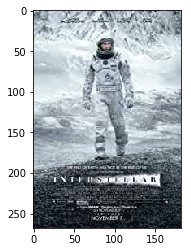

In [14]:
ask_user()